<a href="https://colab.research.google.com/github/akhilps45/Machine_Learning_Models/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

**Polynomial regression is basically linear regression with a twist — instead of fitting a straight line, you fit a curve by adding polynomial terms of your input variable(s).**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [4]:
data= pd.read_csv('/content/Position_Salaries.csv')

In [5]:
data.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [7]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [10]:
data.isna().sum()

,0
Position,0
Level,0
Salary,0


In [11]:
data.duplicated().sum()

np.int64(0)

In [14]:
cm = data[['Level','Salary']].corr()
cm

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


<Axes: >

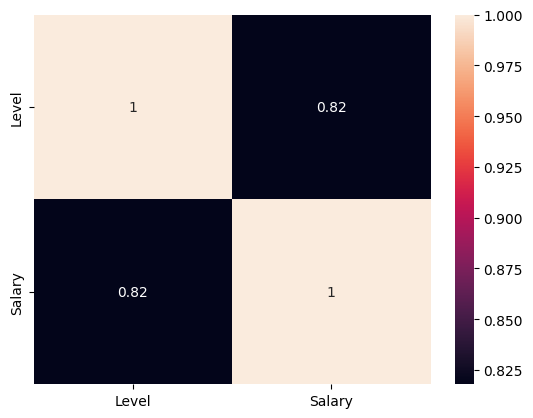

In [15]:
sns.heatmap(cm,annot=True)

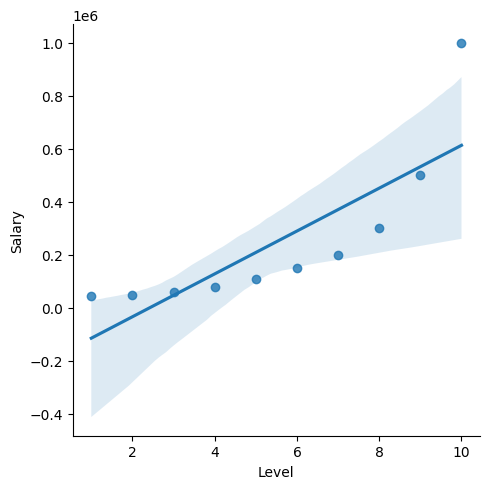

In [18]:
sns.lmplot(x='Level',y= 'Salary',data = data)

In [21]:
x = data['Level']
y = data['Salary']

In [32]:
lr = PolynomialFeatures(degree=5)
x_lr = lr.fit_transform(x.values.reshape(-1,1))

In [33]:
model = LinearRegression()
model.fit(x_lr,y)

LinearRegression()

In [34]:
y_pred = model.predict(x_lr)

In [35]:
model.coef_

array([ 0.00000000e+00,  1.60731002e+05, -1.00378788e+05,  2.81649184e+04,
       -3.44638695e+03,  1.57692308e+02])

In [36]:
model.intercept_

np.float64(-41333.33332987316)

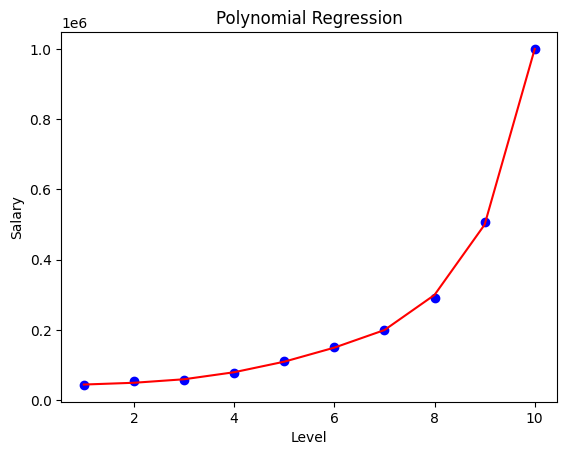

In [37]:
plt.plot(x,y,color='red')
plt.scatter(x,y_pred,color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [39]:
mse = mean_squared_error(y,y_pred)
mse

16382284.38228488

In [40]:
mae = mean_absolute_error(y,y_pred)
mae

3360.83916091242

In [41]:
r2 = r2_score(y,y_pred)
r2

0.9997969027099755

In [42]:
squareroot = np.sqrt(mse)
squareroot

np.float64(4047.5034752653246)

In [43]:
Results = pd.DataFrame({'Actual':y,'Predicted':y_pred})
Results

,Actual,Predicted
0,45000,43895.104896
1,50000,53836.829837
2,60000,57065.268066
3,80000,77286.713287
4,110000,112263.403264
5,150000,152736.596737
6,200000,201349.650350
7,300000,291571.095571
8,500000,506617.715617
9,1000000,998377.622376


In [44]:
r2score = r2_score(y,y_pred)
r2score

0.9997969027099755

so the model is 99 % accurate